In [1]:
# Импортируем нужные библиотеки для анализа данных
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import csv
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')
from sklearn.model_selection import train_test_split

In [16]:
stroke_dataset = pd.read_csv(r"C:\Users\User\Desktop\my-projects\stroke-prediction\dataset\stroke-data.csv")

# EDA

In [17]:
stroke_dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [18]:
stroke_dataset.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [19]:
stroke_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


**По данным Всемирной организации здравоохранения (ВОЗ), инсульт является второй ведущей причиной смерти в мире, ответственной примерно за 11% всех смертей.
Этот набор данных используется для прогнозирования вероятности возникновения инсульта у пациента на основе таких входных параметров, как пол, возраст, различные заболевания и статус курения. Каждая строка в данных содержит соответствующую информацию о пациенте.**



1. **Пол(gender)**: "Мужской", "Женский"
2. **Возраст(age)**: возраст пациента
3. **Гипертония(hypertension)**: 0 - если у пациента нет гипертонии, 1 - если у пациента есть гипертония
4. **Болезнь сердца (heart_disease)**: 0, если у пациента нет никаких заболеваний сердца, 1, если у пациента есть заболевание сердца
5. **Когда-либо состоял в браке(ever_married)**: "Нет" или "Да"
6. **Тип работы(work_type)**: "дети", "гос_джов", "никогда_не_работал", "частный" или "самозанятый".
7. **Тип_жительства(Residence_type)**: "Сельская" или "Городская"
8. **Средний уровень глюкозы(avg_glucose_level)**: средний уровень глюкозы в крови
9. **bmi**: индекс массы тела
10. **Cтатус курения(smoking_status)**: "ранее курил", "никогда не курил", "курит" или "неизвестно "*.
11. **Инсульт(stroke)**: 1, если у пациента был инсульт, или 0, если нет

In [20]:
#deletinig var id
stroke_dataset.drop(['id'], axis=1,inplace=True)

In [21]:
stroke_dataset.smoking_status.value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

**Var Gender**

In [22]:
stroke_dataset['gender'].describe()

count       5110
unique         3
top       Female
freq        2994
Name: gender, dtype: object

In [23]:
stroke_dataset['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [24]:
gender=['Female','Male']
stroke_dataset=stroke_dataset[(stroke_dataset["gender"].isin(gender))]


In [25]:
stroke_dataset['gender'].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

In [26]:
def gender_per():

  fem_count = stroke_dataset.gender.value_counts()['Female']
  male_count = stroke_dataset.gender.value_counts()['Male']
  sum_count = fem_count + male_count

  print(f"Percent of males in dataset is {(100*male_count)/sum_count}")
  print(f"Percent of females in dataset is {(100*fem_count)/sum_count}")

gender_per()

Percent of males in dataset is 41.39753376394598
Percent of females in dataset is 58.60246623605402


У нас в базе из **5110** людей **2994 (59%)** это женщини а **2115(41%)** это мужчини. 

<AxesSubplot:xlabel='gender', ylabel='Count'>

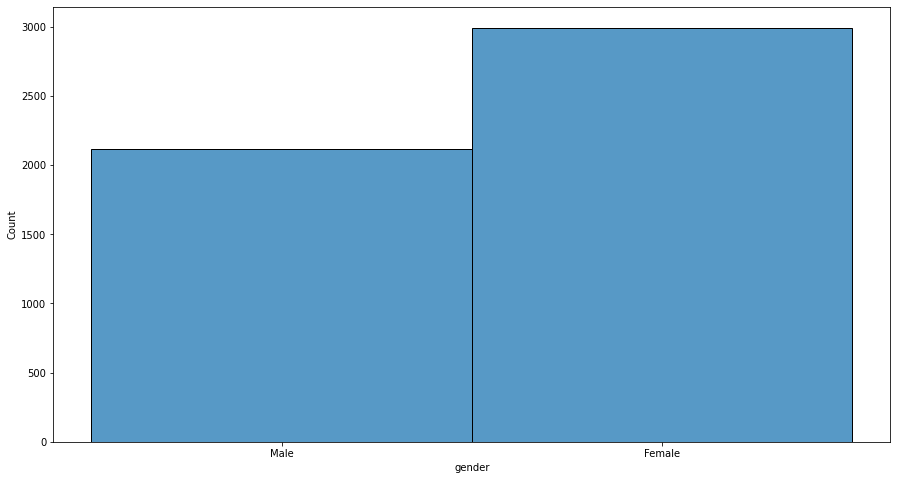

In [27]:
plt.figure(figsize=(15, 8))
sns.histplot(stroke_dataset, x='gender')

<AxesSubplot:xlabel='stroke', ylabel='count'>

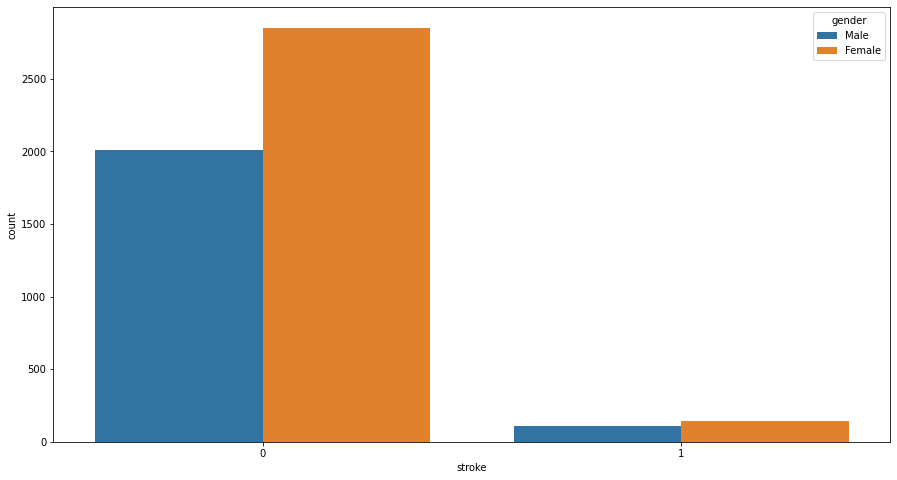

In [28]:
plt.figure(figsize=(15, 8))
sns.countplot(x='stroke', hue='gender', data=stroke_dataset)

Исходя из ситуации больше строке была у женщин (141) случаев а у мажчин (108) случаев.

**Var Age**

In [29]:
stroke_dataset.age.describe()

count    5109.000000
mean       43.229986
std        22.613575
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

<AxesSubplot:xlabel='age', ylabel='Count'>

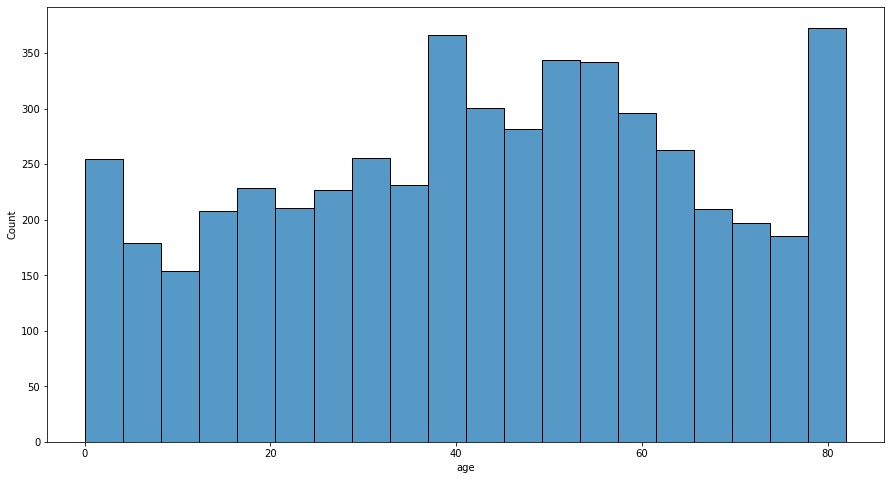

In [30]:
plt.figure(figsize=(15, 8))
sns.histplot(data=stroke_dataset, x='age')

In [31]:
stroke_dataset = stroke_dataset[stroke_dataset['age'] >= 18]

<AxesSubplot:xlabel='age', ylabel='Count'>

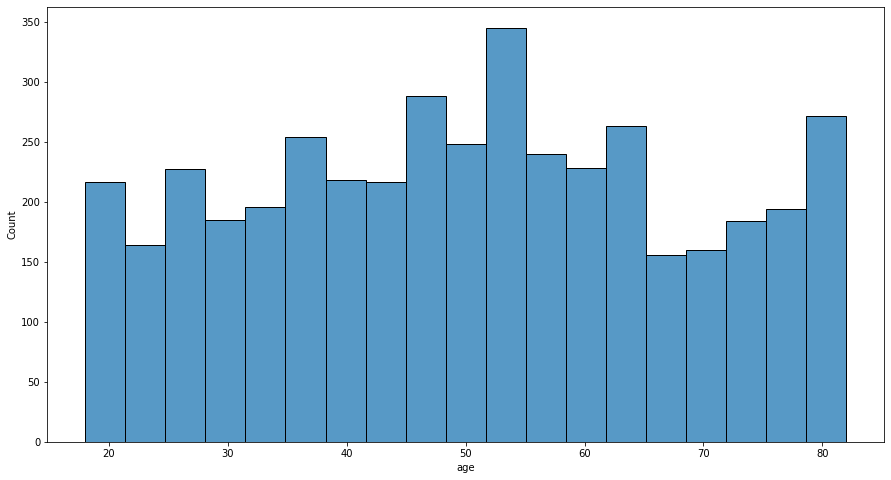

In [32]:
plt.figure(figsize=(15, 8))
sns.histplot(data=stroke_dataset, x='age')

In [33]:
age_stroke = stroke_dataset.groupby('age', as_index=False)['stroke'].count()
age_stroke['age'] = age_stroke['age'].astype('int64')

In [34]:
age_stroke

,age,stroke
0,18,60
1,19,50
2,20,59
3,21,47
4,22,45
...,...,...
60,78,102
61,79,85
62,80,70
63,81,60


<AxesSubplot:xlabel='age', ylabel='count'>

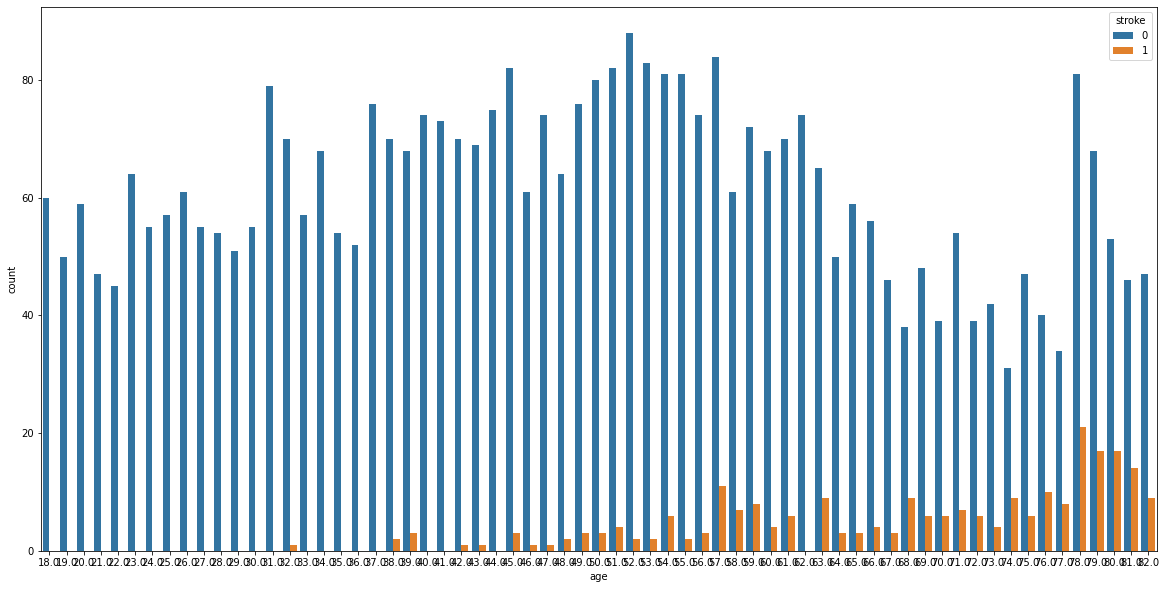

In [35]:
plt.figure(figsize=(20, 10))
sns.countplot(x='age', hue='stroke', data=stroke_dataset)

Исхоя из анализа переменную **Возраст** можно сказать что большиство людей не имели инсульта с возраста **18**  до **40**. С **40** уже начинаеться случаться инсулть. Можно сделать вывод что перемнная **Возраст** имееть положительная корреляция с перенной **Инсульт**.

Var  Hypertension:

    Гипертония - или повышенное кровяное давление — серьезное патологическое состояние, значительно повышающее риск развития заболеваний сердечно-сосудистой системы, головного мозга, почек и других болезней

In [36]:
stroke_dataset['hypertension'].describe(

    
)

count    4253.000000
mean        0.116859
std         0.321290
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: hypertension, dtype: float64

<AxesSubplot:xlabel='hypertension', ylabel='count'>

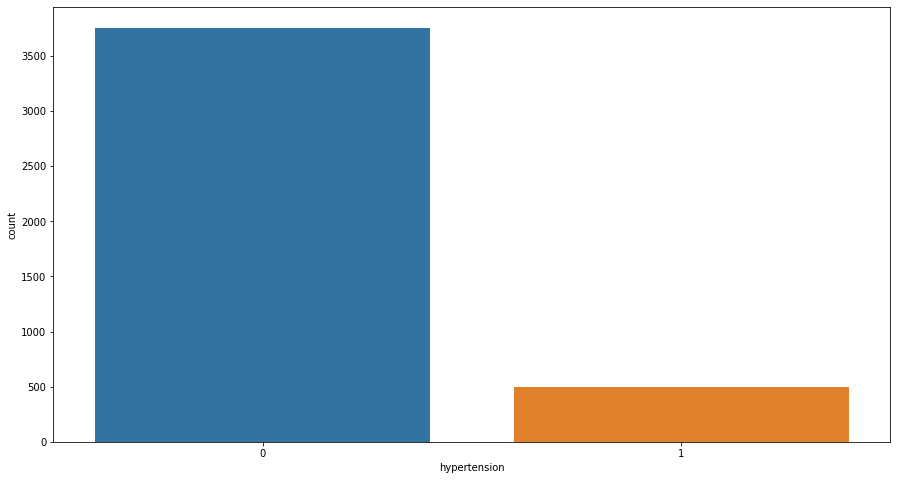

In [37]:
plt.figure(figsize=(15, 8))
sns.countplot(x='hypertension', data=stroke_dataset)

In [38]:
stroke_dataset.hypertension.value_counts()

0    3756
1     497
Name: hypertension, dtype: int64

<AxesSubplot:xlabel='hypertension', ylabel='count'>

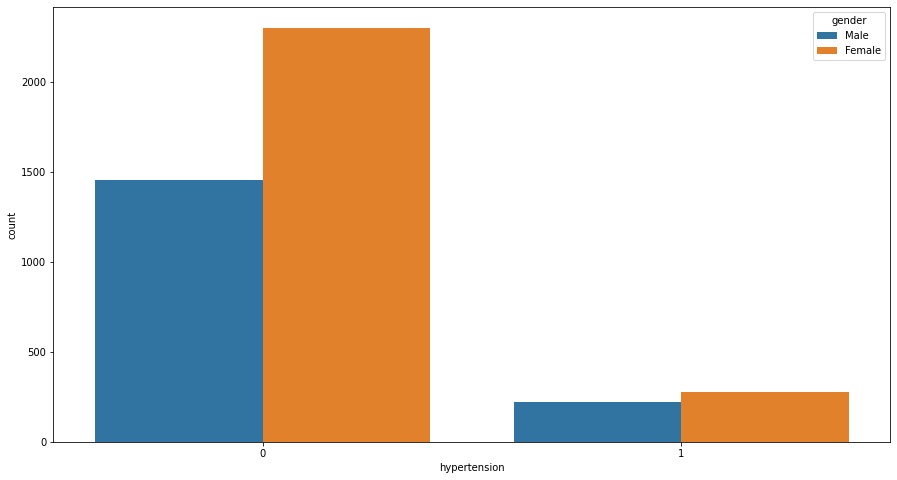

In [39]:
plt.figure(figsize=(15, 8))
sns.countplot(x='hypertension', hue='gender', data=stroke_dataset)

<AxesSubplot:xlabel='age', ylabel='count'>

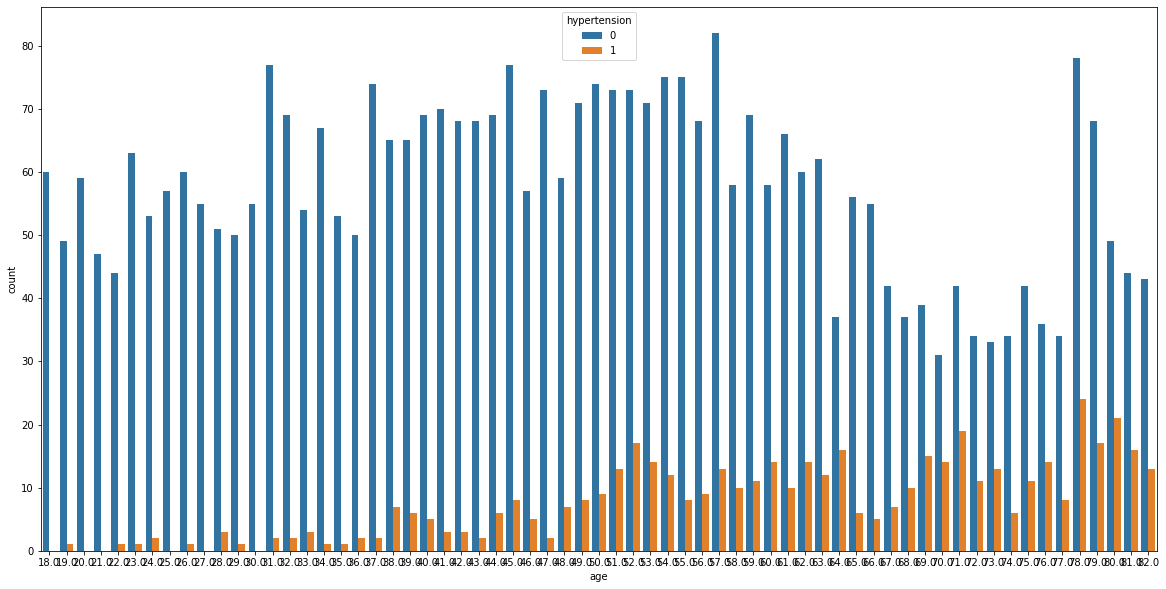

In [40]:
plt.figure(figsize=(20, 10))
sns.countplot(x='age', hue='hypertension', data=stroke_dataset)

Var Heart_disease

<AxesSubplot:xlabel='heart_disease', ylabel='count'>

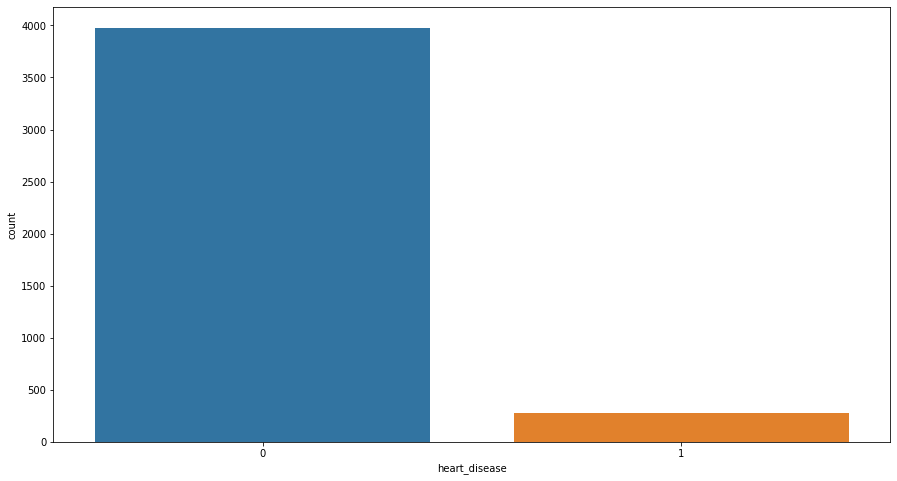

In [41]:
plt.figure(figsize=(15, 8))
sns.countplot(x='heart_disease', data=stroke_dataset)

In [42]:
stroke_dataset.heart_disease.value_counts()

0    3978
1     275
Name: heart_disease, dtype: int64

<AxesSubplot:xlabel='heart_disease', ylabel='count'>

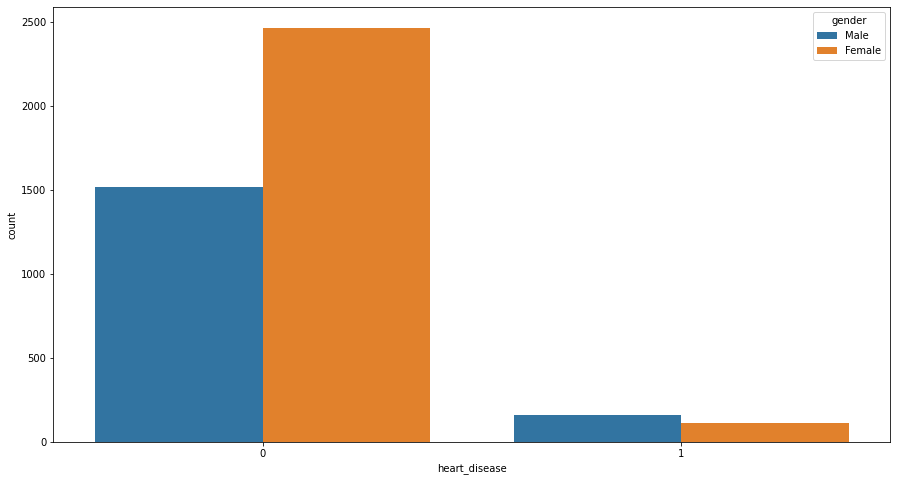

In [43]:
plt.figure(figsize=(15, 8))
sns.countplot(x='heart_disease', hue='gender', data=stroke_dataset)

<AxesSubplot:xlabel='age', ylabel='count'>

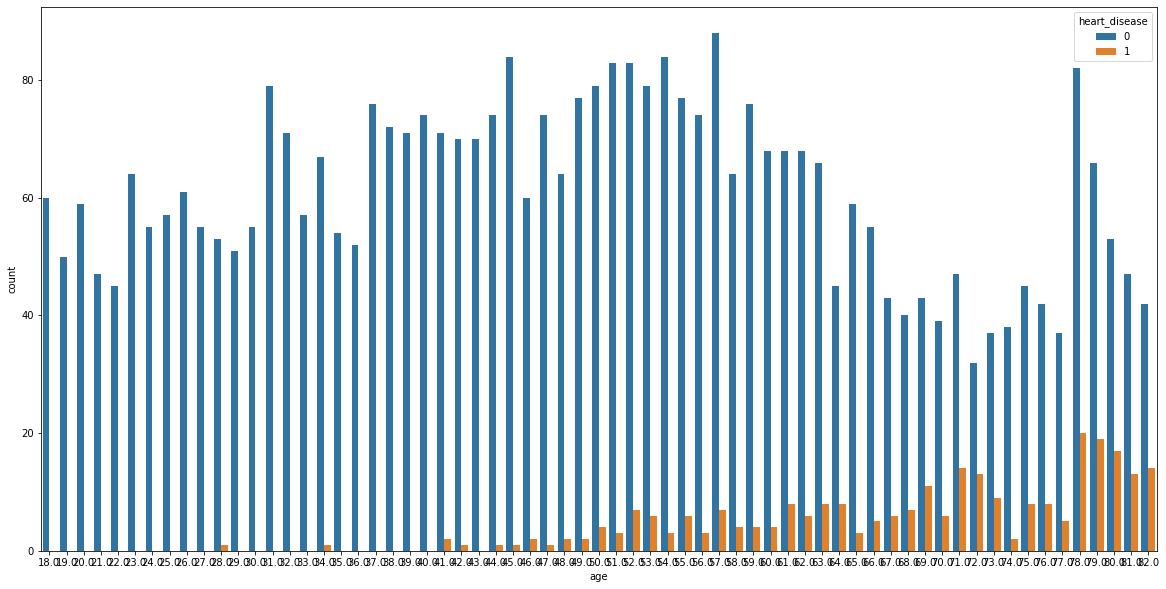

In [44]:
plt.figure(figsize=(20, 10))
sns.countplot(x='age', hue='heart_disease', data=stroke_dataset)

Var Ever_Married

In [45]:
stroke_dataset.ever_married.describe()

count     4253
unique       2
top        Yes
freq      3353
Name: ever_married, dtype: object

In [47]:
stroke_dataset.ever_married.value_counts()

Yes    3353
No      900
Name: ever_married, dtype: int64

<AxesSubplot:xlabel='ever_married', ylabel='count'>

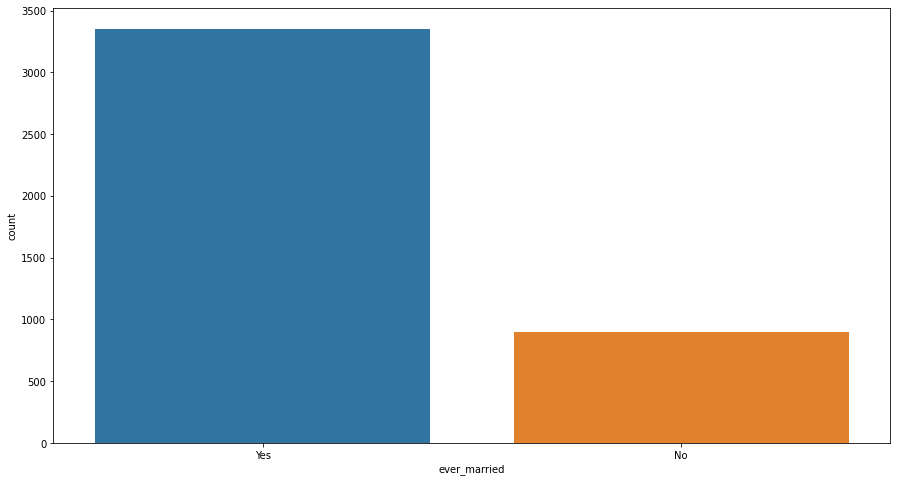

In [48]:
plt.figure(figsize=(15, 8))
sns.countplot(x='ever_married', data=stroke_dataset)

<AxesSubplot:xlabel='ever_married', ylabel='count'>

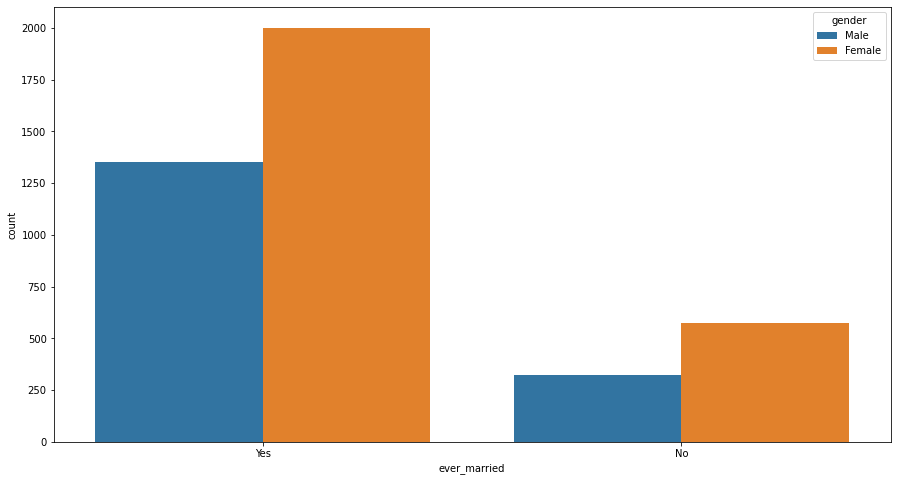

In [49]:
plt.figure(figsize=(15, 8))
sns.countplot(x='ever_married',hue='gender', data=stroke_dataset)

<AxesSubplot:xlabel='age', ylabel='count'>

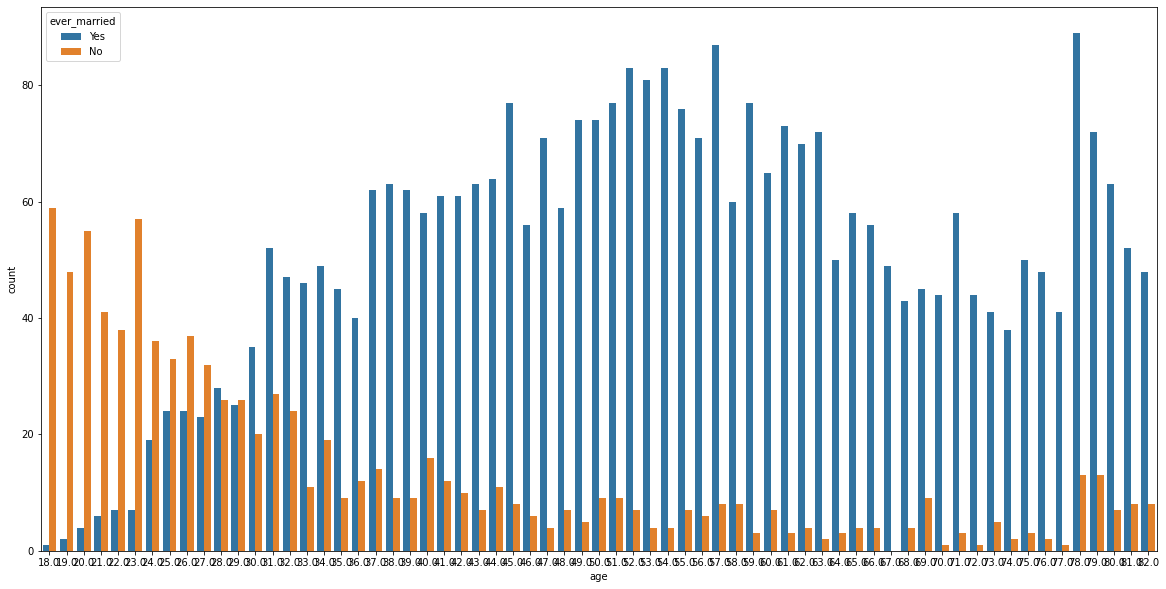

In [50]:
plt.figure(figsize=(20, 10))
sns.countplot(x='age', hue='ever_married', data=stroke_dataset)

<AxesSubplot:xlabel='ever_married', ylabel='count'>

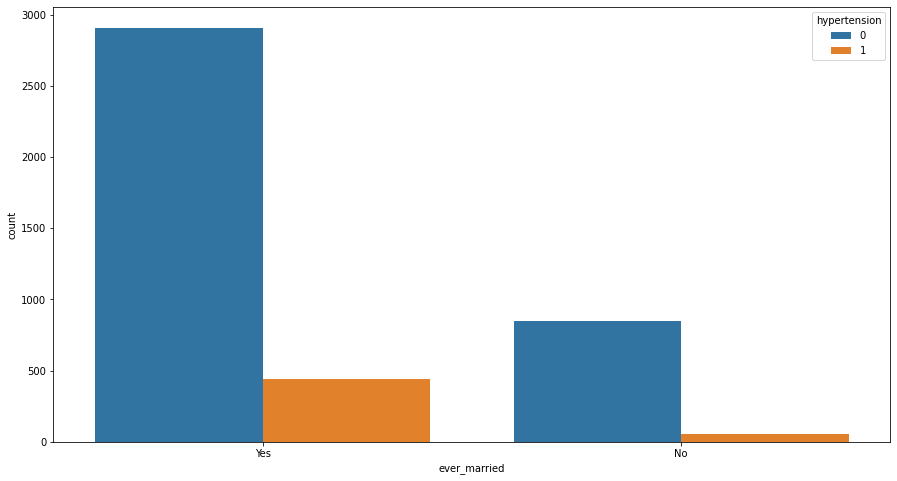

In [51]:
plt.figure(figsize=(15, 8))
sns.countplot(x='ever_married',hue='hypertension', data=stroke_dataset)

<AxesSubplot:xlabel='ever_married', ylabel='count'>

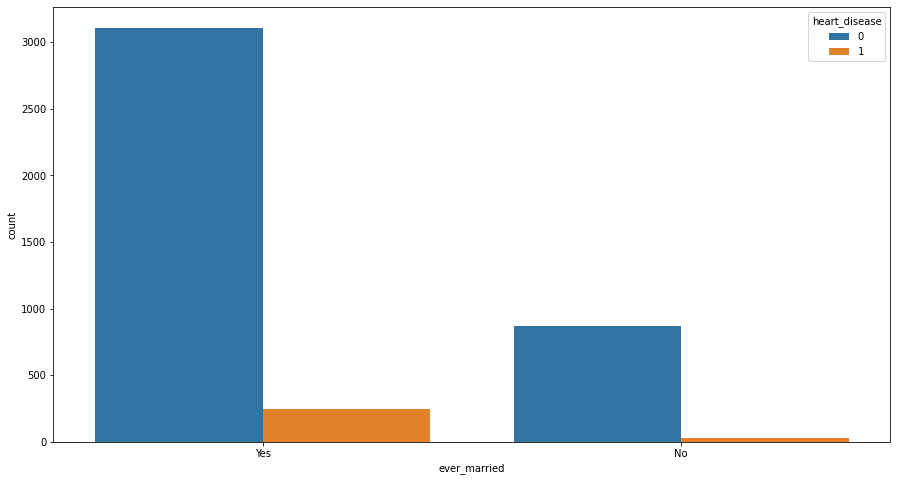

In [52]:
plt.figure(figsize=(15, 8))
sns.countplot(x='ever_married',hue='heart_disease', data=stroke_dataset)

In [53]:
stroke_dataset

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


Data preproc

In [54]:
stroke_dataset['age']= stroke_dataset['age'].astype('int64')

In [55]:
stroke_dataset

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [56]:
stroke_dataset.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  181
smoking_status         0
stroke                 0
dtype: int64

In [57]:
stroke_dataset.dropna(axis=0, inplace=True)

In [58]:
stroke_dataset

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5103,Female,18,0,0,No,Private,Urban,82.85,46.9,Unknown,0
5106,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [59]:
stroke_dataset.reset_index(drop=True, inplace=True)

WorkType

In [61]:
stroke_dataset['work_type'].describe()

count        4072
unique          4
top       Private
freq         2680
Name: work_type, dtype: object

In [70]:
stroke_dataset.work_type.value_counts()

Private          2680
Self-employed     763
Govt_job          624
Never_worked        5
Name: work_type, dtype: int64

<AxesSubplot:xlabel='work_type', ylabel='count'>

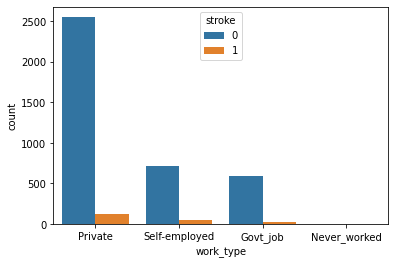

In [87]:
sns.countplot(x='work_type',hue='stroke', data=stroke_dataset)

<AxesSubplot:xlabel='work_type', ylabel='count'>

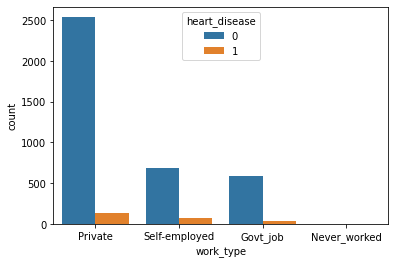

In [98]:
sns.countplot(x='work_type',hue='heart_disease', data=stroke_dataset)

In [66]:
stroke_dataset.groupby(['work_type', 'stroke'])['stroke'].count()

work_type      stroke
Govt_job       0          596
               1           28
Never_worked   0            5
Private        0         2553
               1          127
Self-employed  0          710
               1           53
Name: stroke, dtype: int64

У нас в данных больше людей который у них тип работы Private - 2680, Self-employed - 763, Govt_job - 624,  Never_worked - 5.
По визуализации видно что больше всего у тех кто работают Private у них случаеться инсульт.

Residence_type

In [90]:
stroke_dataset.Residence_type.describe()

count      4072
unique        2
top       Urban
freq       2074
Name: Residence_type, dtype: object

In [91]:
stroke_dataset.Residence_type.value_counts()

Urban    2074
Rural    1998
Name: Residence_type, dtype: int64

Rural - Сельские

Urban - Городской

У нас в базе почти одинаковое количество людей живуших в городе и в селе.

In [95]:
stroke_dataset.groupby(['Residence_type', 'stroke'])['stroke'].count()

Residence_type  stroke
Rural           0         1899
                1           99
Urban           0         1965
                1          109
Name: stroke, dtype: int64

In [94]:
fig = px.bar(stroke_dataset.Residence_type.value_counts())
fig.show()

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

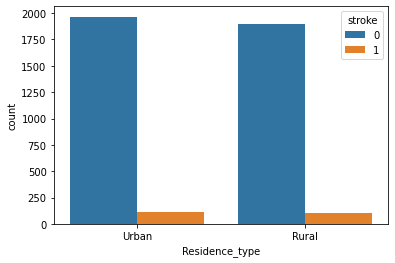

In [96]:
sns.countplot(x='Residence_type', hue='stroke', data=stroke_dataset)

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

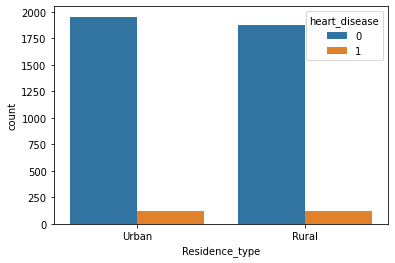

In [97]:
sns.countplot(x='Residence_type', hue='heart_disease', data=stroke_dataset)

Исходя из выше сделанных анализов можно сделать вывод что где жыветь человек не влияеть на получение инсульта

In [99]:
stroke_dataset

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4067,Female,18,0,0,No,Private,Urban,82.85,46.9,Unknown,0
4068,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
4069,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
4070,Male,51,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


Glucose_level

In [100]:
stroke_dataset.avg_glucose_level.describe()

count    4072.000000
mean      107.601677
std        46.945432
min        55.120000
25%        77.255000
50%        92.205000
75%       115.322500
max       271.740000
Name: avg_glucose_level, dtype: float64

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Count'>

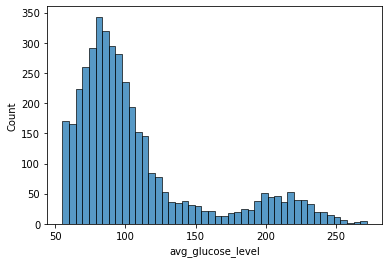

In [108]:
sns.histplot(data=stroke_dataset, x='avg_glucose_level')

In [110]:
fig = px.box(stroke_dataset, x='avg_glucose_level', color='stroke')
fig.show()

In [111]:
not_stroke_avg_glu = stroke_dataset[stroke_dataset['stroke'] == 0]
stroke_avg_glu =  stroke_dataset[stroke_dataset['stroke'] == 1]

In [45]:
stroke_dataset.to_csv(r"C:\Users\User\Desktop\my-projects\stroke_prediction\dataset\updated_stoke_dataset.csv", index=False)

In [47]:
stroke_dataset.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [73]:
cat_columns = ['gender', 'hypertension', 
                'ever_married',
                'work_type', 'Residence_type', 
                'smoking_status'
  ]

In [74]:
cat = stroke_dataset[cat_columns]

In [83]:
#function for encoding categorical data to numeric
def make_encoder(data):
  cat_columns = ['gender', 'hypertension', 
                'ever_married',
                'work_type', 'Residence_type', 
                'smoking_status'
  ]
  encoded_data = encoder.fit_transform(data[cat_columns])
  encoded_data = encoded_data.toarray()
  column_encoded_data = encoder.get_feature_names()
  dataframe = pd.DataFrame(encoded_data, columns=column_encoded_data)
  return dataframe, encoder

encoded_data, data_encoder = make_encoder(cat)

In [84]:
encoded_data

,x0_Female,x0_Male,x1_0,x1_1,x2_No,x2_Yes,x3_Govt_job,x3_Never_worked,x3_Private,x3_Self-employed,x4_Rural,x4_Urban,x5_Unknown,x5_formerly smoked,x5_never smoked,x5_smokes
0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4067,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4068,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4069,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
4070,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [90]:
stroke_dataset.reset_index(drop=True, inplace=True)

In [91]:
final_data = stroke_dataset.join(encoded_data)

In [92]:
final_data.drop(cat_columns, axis=1, inplace=True)

In [93]:
final_data

,age,heart_disease,avg_glucose_level,bmi,stroke,x0_Female,x0_Male,x1_0,x1_1,x2_No,...,x3_Govt_job,x3_Never_worked,x3_Private,x3_Self-employed,x4_Rural,x4_Urban,x5_Unknown,x5_formerly smoked,x5_never smoked,x5_smokes
0,67,1,228.69,36.6,1,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,80,1,105.92,32.5,1,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,49,0,171.23,34.4,1,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,79,0,174.12,24.0,1,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
4,81,0,186.21,29.0,1,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4067,18,0,82.85,46.9,0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4068,81,0,125.20,40.0,0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4069,35,0,82.99,30.6,0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
4070,51,0,166.29,25.6,0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [95]:
import joblib

joblib.dump(data_encoder, r"C:\Users\User\Desktop\my-projects\stroke_prediction\models/data_encoder.pkl")

['C:\\Users\\User\\Desktop\\my-projects\\stroke_prediction\\models/data_encoder.pkl']

In [96]:
def splitting(data):
    train, test = train_test_split(data, test_size=0.2)
    train.to_csv(r"C:\Users\User\Desktop\my-projects\stroke_prediction\dataset\train_dataset.csv", index=False)
    test.to_csv(r"C:\Users\User\Desktop\my-projects\stroke_prediction\dataset\test_dataset.csv", index=False)

splitting(final_data)